In [19]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [20]:
# Î¶¨Î∑∞ Ï∂úÎ†•Ïãú ... ÏóÜÏù¥ Ï†ÑÎ∂Ä ÎÇòÏò§Í≤å ÏÑ§Ï†ï
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [21]:
shopping_data = pd.read_csv(r"C:\Users\NT550\asac\SIH\SIH\code2\result\naver_shopping_preprocess.csv", index_col=0)

In [22]:
shopping_data.head()

Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                  Ï†úÌíàÎ™Ö      Í∞ÄÍ≤©  ÌèâÍ∑†ÌèâÏ†ê  \
0  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
1  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
2  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
3  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   
4  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   

           ÏïÑÏù¥Îîî   ÌèâÏ†ê         ÎÇ†Ïßú  \
0  miri*******  5.0  23.08.16.   
1    dltm*****  5.0  23.07.28.   
2     yjdr****  5.0  23.08.06.   
3      2133***  5.0  23.07.13.   
4     klys****  5.0  23.08.12.   

                                                Ï¢ÖÎ•ò                       ÏöîÏïΩ  \
0  30Ìè¨ ÏÑ†ÌÉù1: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
1           30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: Î∞§\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
2    30Ìè¨ ÏÑ†ÌÉù1: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù2: Ïò¨Ïù∏Ïõê / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n   Ïú†ÌÜµÍ∏∞ÌïúÍΩ§ ÎÇ®ÏïòÏñ¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
3       30Ìè¨ ÏÑ†ÌÉù1: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù3: Ïò¨Ïù∏Ïõê\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   
4      30Ìè¨ ÏÑ†ÌÉù1: ÏïºÏÉùÌôî / 30Ìè¨ ÏÑ†ÌÉù2: Î∞§ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   

                                                                                                                                                                                                                                     Î¶¨Î∑∞  \
0                                                                                                                                                        ÌïúÎã¨ÏÇ¨Ïö©Í∏∞Ïû¨Íµ¨Îß§Î®πÍ∏∞ Ìé∏ÌïòÍ≥† ÌíàÏßàÎèÑ Ï¢ãÏïÑÏöî. Î∞õÎäî ÏÜêÎãòÎèÑ Ï¢ãÏïÑ ÌïòÏãúÍ≥† Íµ¨Îß§Îì±Í∏âÎèÑ Îî∞Î°ú ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Î¨∏Ï†ú ÏÉùÍ∏∞Î©¥ Î∞îÎ°ú Ï≤òÎ¶¨ Ìï¥Ï£ºÏãúÍ≥† Ï¢ãÏïÑÏöî!   
1                                                                      Í∞ÑÌé∏ÌïòÍ≤å ÌïòÎ£®ÌïúÌè¨Ïî©Î®πÍ≤åÎêòÏöî~ÎÉâÏû•Ïù¥ÎÇò ÎÉâÎèôÏúºÎ°ú Ìï¥ÏÑú ÏãúÏõêÌïòÍ≤å Î®πÏúºÎãà ÎßõÏûáÏñ¥Ïöî!!Î∞§ÍøÄÏù¥ ÎßéÏù¥ Ïì∏Ï§ÑÏïåÏïóÎäîÎç∞ Ïì¥Í±¥ Ïûò ÏïàÎ®πÎäîÌé∏Ïù¥Í∏∞ÎèÑ ÌïòÍµ¨Ïöî  ÏÉùÍ∞ÅÎ≥¥Îã§ ÏßÑÌïòÎãà Î®πÏùÑÎßåÌñàÏñ¥Ïöî ÏöîÏ¶ò Î©¥Ïó≠Ïù¥ ÎßéÏù¥ Îñ®Ïñ¥ÏßÄÍ∏∞ÎèÑ ÌñàÍ≥† Í≤∏ÏÇ¨Í≤∏ÏÇ¨ Íµ¨Îß§ÌñàÎäîÎç∞ ÎßàÏùåÏóêÎì§Ïñ¥ÏÑú Îã§ÏùåÏóê Ïû¨Íµ¨Îß§Ìï¥ÏïºÍ≤†Ïñ¥Ïöî! ÏÑ†Î¨ºÏö©ÏúºÎ°úÎèÑ ÎÑàÎ¨¥ Ï¢ãÏùÑÍ±∞ Í∞ôÏïÑÏöî!   
2                                                                                                     ÌôçÏÇºÏù¥ Ïó¨ÏûêÎ™∏Ïóê ÏïàÏ¢ãÎã§Í≥†Ìï¥ÏÑú.. Í∑∏ÎèôÏïà ÏïàÎ®πÎã§Í∞Ä ÍøÄ Ïä§Ìã± Î≥¥Í≥† Ï£ºÎ¨∏ÌñàÏäµÎãàÎã§\nÎãπÎñ®Ïñ¥ÏßÄÍ∏∞Ï†ÑÏóê Î®πÏúºÎ©¥ Ï¢ãÍµ¨Ïöî Î∞ñÏóêÏÑúÎèÑ ÏâΩÍ≤å Î®πÏùÑÏàòÏûàÏñ¥Ïöî. Ïù¥ÏßÄÏª∑Ïù¥ Ïûò ÎúØÏñ¥ÏßëÎãàÎã§.\nÏ∫°ÏäêÏª§Ìîº ÎÇ¥Î†§Î®πÏùÑÎïå ÎÑ£Ïñ¥Î®πÏùÑÏàòÎèÑ ÏûàÎÑ§Ïöî\nÎã§Î®πÏúºÎ©¥ Îòê Ï£ºÎ¨∏ÌïòÎ†§Íµ¨Ïöî „Öé„Öé   
3  BESTÍøÄÏù¥ ÌîºÎ°ú ÌöåÎ≥µ, Í∏∞Í¥ÄÏßÄÏóê Ï¢ãÎã§Í≥† ÌïòÎäîÎç∞ ÏÇ¨Ïã§ Ïñ¥ÎäêÏ†ïÎèÑÍ∞Ä Ï†ÅÎãπÌïúÏßÄ, ÎÑàÎ¨¥ ÎßéÏù¥ Î®πÏúºÎ©¥ ÏïàÏ¢ãÏùÄ Í±¥ ÏïÑÎãåÏßÄ Í≥†ÎØºÎêòÎçîÎùºÍµ¨Ïöî„Ö†\nÌäπÌûà Î∂ÄÎ™®ÎãòÍªò ÏÑ†Î¨ºÌï† Í±¥Îç∞ ÍøÄ ÎßéÏù¥ ÎìúÏÖîÏÑú Îãπ ÏàòÏπòÍ∞Ä Ïò¨ÎùºÍ∞àÍπåÎ¥ê Í±±Ï†ïÎê¨ÏóàÎäîÎç∞ ÏÜåÎüâÏúºÎ°ú Î®πÍ∏∞ Ï¢ãÍ≤å Ïä§Ìã± Ìè¨Ïû• ÎêòÏñ¥ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî !\nÎ≥ëÏóê Îã¥Í∏¥ ÍøÄÏùÄ Îß§Ïùº Í∫ºÎÇ¥ÏÑú Îñ†Î®πÍ∏∞Í∞Ä Î∂àÌé∏ÌïòÍ≥† Ï†ÅÏ†ïÎüâÏùÑ Î®πÎäîÍ±¥ÏßÄ

In [23]:
shopping_data['cleaned_tokens'].dropna(inplace=True)

In [24]:
def kw_in_df(keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(shopping_data[shopping_data['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']),'Í±¥')
    return shopping_data[shopping_data['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']

In [25]:
def kw_in_nouns(keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(shopping_data[shopping_data['cleaned_tokens'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']),'Í±¥')
    return shopping_data[shopping_data['cleaned_tokens'].apply(lambda x:keyword in x)]['Î¶¨Î∑∞']

In [26]:
#ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìï®Ïàò
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/ÏûáÎçî/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = r'C:\Users\NT550\asac\SIH\SIH\Kurly\NanumBarunGothic.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [27]:
shopping_data.dropna(subset=['Î¶¨Î∑∞'], inplace=True)
shopping_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55796 entries, 0 to 57140
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0.1    55796 non-null  int64  
 1   Unnamed: 0      55796 non-null  int64  
 2   Ï†úÌíàÎ™Ö             55796 non-null  object 
 3   Í∞ÄÍ≤©              55796 non-null  object 
 4   ÌèâÍ∑†ÌèâÏ†ê            51760 non-null  float64
 5   ÏïÑÏù¥Îîî             55796 non-null  object 
 6   ÌèâÏ†ê              55796 non-null  float64
 7   ÎÇ†Ïßú              55796 non-null  object 
 8   Ï¢ÖÎ•ò              54441 non-null  object 
 9   ÏöîÏïΩ              55796 non-null  object 
 10  Î¶¨Î∑∞              55796 non-null  object 
 11  ko_review       55763 non-null  object 
 12  token_nouns     55796 non-null  object 
 13  token           55796 non-null  object 
 14  cleaned_tokens  55796 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 6.8+ MB


In [28]:
shopping_data['cleaned_tokens'].info()

<class 'pandas.core.series.Series'>
Int64Index: 55796 entries, 0 to 57140
Series name: cleaned_tokens
Non-Null Count  Dtype 
--------------  ----- 
55796 non-null  object
dtypes: object(1)
memory usage: 871.8+ KB


In [29]:
def wc_kw(kw_option, keyword):
    if kw_option == 1: # 1ÏùÄ Î™ÖÏÇ¨ ÌÇ§ÏõåÎìú
        return wc_analysis(shopping_data[shopping_data['Î¶¨Î∑∞'].apply(lambda x:keyword in x)]['cleaned_tokens'])
    else:
        return print('ÏòµÏÖò ÌôïÏù∏')

In [30]:
shopping_data.head(1)

Unnamed: 0.1  Unnamed: 0  \
0             0           0   

                                                  Ï†úÌíàÎ™Ö      Í∞ÄÍ≤©  ÌèâÍ∑†ÌèâÏ†ê  \
0  ÌóàÎãàÎ∞îÏù¥ÌóàÎãà Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± 90Ìè¨ÏûÖ Íµ≠ÏÇ∞ ÏïÑÏπ¥ÏãúÏïÑ 5Ï¢Ö ÏÑ†Î¨º ÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞]Ïò§ÎäòÏ∂úÎ∞ú  72,000   4.9   

           ÏïÑÏù¥Îîî   ÌèâÏ†ê         ÎÇ†Ïßú  \
0  miri*******  5.0  23.08.16.   

                                                Ï¢ÖÎ•ò                       ÏöîÏïΩ  \
0  30Ìè¨ ÏÑ†ÌÉù1: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù2: ÏïÑÏπ¥ÏãúÏïÑ / 30Ìè¨ ÏÑ†ÌÉù3: ÏïÑÏπ¥ÏãúÏïÑ\n  Ïú†ÌÜµÍ∏∞ÌïúÏïÑÏ£º ÎÑâÎÑâÌï¥ÏöîÌè¨Ïû•ÍººÍººÌï¥ÏöîÌé∏Î¶¨Ìé∏Î¶¨Ìï¥Ïöî   

                                                                               Î¶¨Î∑∞  \
0  ÌïúÎã¨ÏÇ¨Ïö©Í∏∞Ïû¨Íµ¨Îß§Î®πÍ∏∞ Ìé∏ÌïòÍ≥† ÌíàÏßàÎèÑ Ï¢ãÏïÑÏöî. Î∞õÎäî ÏÜêÎãòÎèÑ Ï¢ãÏïÑ ÌïòÏãúÍ≥† Íµ¨Îß§Îì±Í∏âÎèÑ Îî∞Î°ú ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî. Î¨∏Ï†ú ÏÉùÍ∏∞Î©¥ Î∞îÎ°ú Ï≤òÎ¶¨ Ìï¥Ï£ºÏãúÍ≥† Ï¢ãÏïÑÏöî!   

                                                                     ko_review  \
0  ÌïúÎã¨ÏÇ¨Ïö©Í∏∞Ïû¨Íµ¨Îß§Î®πÍ∏∞ Ìé∏ÌïòÍ≥† ÌíàÏßàÎèÑ Ï¢ãÏïÑÏöî Î∞õÎäî ÏÜêÎãòÎèÑ Ï¢ãÏïÑ ÌïòÏãúÍ≥† Íµ¨Îß§Îì±Í∏âÎèÑ Îî∞Î°ú ÏûàÏñ¥ÏÑú Ï¢ãÏïÑÏöî Î¨∏Ï†ú ÏÉùÍ∏∞Î©¥ Î∞îÎ°ú Ï≤òÎ¶¨ Ìï¥Ï£ºÏãúÍ≥† Ï¢ãÏïÑÏöî   

                                                  token_nouns  \
0  ['Îã¨', 'ÏÇ¨Ïö©', 'Í∏∞Ïû¨', 'Íµ¨Îß§', 'ÌíàÏßà', 'ÏÜê', 'Íµ¨Îß§', 'Îì±Í∏â', 'Î¨∏Ï†ú', 'Ï≤òÎ¶¨']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     token  \
0  [('Ìïú', 'XPN'), ('Îã¨', 'NNG'), ('ÏÇ¨Ïö©', 'NNG'), ('Í∏∞Ïû¨', 'NNG'), ('Íµ¨Îß§', 'NNG'), ('Î®π', 'VV'), ('Í∏∞', 'ETN'), ('Ìé∏Ìïò', 'VA'), ('Í≥†', 'EC'), ('ÌíàÏßà', 'NNG'), ('ÎèÑ', 'JX'), ('Ï¢ã', 'VA'), ('ÏïÑÏöî', 'EF'), ('Î∞õ', 'VV'), ('Îäî', 'ETM'), ('ÏÜê', 'NNG'), ('Îãò', 'XSN'), ('ÎèÑ', 'JX'), ('Ï¢ãÏïÑÌïò', 'VV'), ('Ïãú', 'EP'), ('Í≥†', 'EC'), ('Íµ¨Îß§', 'NNG'), ('Îì±Í∏â', 'NNG'), ('ÎèÑ', 'JX'), ('Îî∞Î°ú', 'MAG'), ('Ïûà', 'VA'), ('Ïñ¥ÏÑú', 'EC'), ('Ï¢ã', 'VA'), ('ÏïÑÏöî', 'EF'), ('Î¨∏Ï†ú', 'NNG'), ('ÏÉùÍ∏∞', 'VV'), ('Î©¥', 'EC'), ('Î∞îÎ°ú', 'MAG'), ('Ï≤òÎ¶¨', 'NNG'), ('Ìïò', 'VV'), ('ÏïÑ', 'EC'), ('Ï£º', 'VX'), ('Ïãú', 'EP'), ('Í≥†', 'EC'), ('Ï¢ã', 'VA'), ('ÏïÑÏöî', 'EF')]   

                                          cleaned_tokens  
0  ['ÏÇ¨Ïö©', 'Í∏∞Ïû¨', 'Íµ¨Îß§', 'ÌíàÏßà', 'ÏÜê', 'Íµ¨Îß§', 'Îì±Í∏â', 'Î¨∏Ï†ú', 'Ï≤òÎ¶¨']

In [31]:
shopping_data['cleaned_tokens'] = shopping_data['cleaned_tokens'].apply(lambda x: eval(x))
shopping_data['token'] = shopping_data['token'].apply(lambda x: eval(x))

In [32]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

# Ï†úÌíàÎ¶¨Î∑∞Î≥Ñ ÌÇ§ÏõåÎìú ÎπÑÏú® ÌååÏïÖ

In [33]:
Elegance = ['Í≥†Í∏â','Ïö∞ÏïÑ','ÌíàÏúÑ','Îü≠ÏÖîÎ¶¨','Í≥†ÌÄÑ','ÏÑ∏Î†®']
Prettey = ['ÏòàÏÅò','Ïù¥ÏÅò','ÏòàÏÅ®','Ïù¥ÏÅ®','Ïù¥Îøå','ÏòàÎøå','ÏïÑÎ¶ÑÎã§']
Simple =['ÍπîÎÅî','Ïã¨Ìîå','Ï†ïÍ∞à','Ï†ïÎèà']

In [34]:

def calculate_ratio(keyword_list, product_reviews):
    total_reviews = len(product_reviews)
    keyword_reviews = product_reviews[product_reviews.apply(lambda x: any(keyword in x for keyword in keyword_list))]
    keyword_count = len(keyword_reviews)
    ratio = keyword_count / total_reviews
    return ratio

def find_high_ratio_products(keyword_list, review_data):
    product_ratios = []
    unique_products = review_data['Ï†úÌíàÎ™Ö'].unique()

    for idx, product in enumerate(unique_products, start=1):
        product_reviews = review_data[review_data['Ï†úÌíàÎ™Ö'] == product]['Î¶¨Î∑∞']
        if len(product_reviews) >= 100:  # Î¶¨Î∑∞Í∞Ä ÏûàÎäî Í≤ΩÏö∞Îßå Ï≤òÎ¶¨
            ratio = calculate_ratio(keyword_list, product_reviews)
            product_ratios.append((product, idx, ratio))

    sorted_ratios = sorted(product_ratios, key=lambda x: x[2], reverse=True)
    return sorted_ratios


elegance_keywords = ['Í≥†Í∏â', 'Ïö∞ÏïÑ', 'ÌíàÏúÑ', 'Îü≠ÏÖîÎ¶¨', 'Í≥†ÌÄÑ', 'ÏÑ∏Î†®']
pretty_keywords = ['ÏòàÏÅò', 'Ïù¥ÏÅò', 'ÏòàÏÅ®', 'Ïù¥ÏÅ®', 'Ïù¥Îøå', 'ÏòàÎøå', 'ÏïÑÎ¶ÑÎã§']
simple_keywords = ['ÍπîÎÅî', 'Ïã¨Ìîå', 'Ï†ïÍ∞à', 'Ï†ïÎèà']

elegance_products = find_high_ratio_products(elegance_keywords, shopping_data)
pretty_products = find_high_ratio_products(pretty_keywords, shopping_data)
simple_products = find_high_ratio_products(simple_keywords, shopping_data)

for idx, (product, product_idx, ratio) in enumerate(elegance_products):
    print(f"ÏàúÏúÑ: {idx+1}, Ï†úÌíàÎ≤àÌò∏: {product_idx}, Ï†úÌíàÎ™Ö: {product}, 'Í≥†Í∏â' Í¥ÄÎ†® ÎπÑÏú®: {ratio:.2%}")

for idx, (product, product_idx, ratio) in enumerate(pretty_products):
    print(f"ÏàúÏúÑ: {idx+1}, Ï†úÌíàÎ≤àÌò∏: {product_idx}, Ï†úÌíàÎ™Ö: {product}, 'ÏòàÏÅò' Í¥ÄÎ†® ÎπÑÏú®: {ratio:.2%}")

for idx, (product, product_idx, ratio) in enumerate(simple_products):
    print(f"ÏàúÏúÑ: {idx+1}, Ï†úÌíàÎ≤àÌò∏: {product_idx}, Ï†úÌíàÎ™Ö: {product}, 'ÍπîÎÅî' Í¥ÄÎ†® ÎπÑÏú®: {ratio:.2%}")


ÏàúÏúÑ: 1, Ï†úÌíàÎ≤àÌò∏: 70, Ï†úÌíàÎ™Ö: ÏßÄÌÜµ2p ÏãúÍ∑∏ÎãàÏ≤ò Ï≤úÏó∞ÍøÄÎ∏îÎ†åÎî© ÌóàÎãàÏä§Ìã±&ÌóàÎãàÏ∫°Ïäê ÏßÄÌÜµ2p Î∞ïÏä§ÏÑ†Î¨ºÏÑ∏Ìä∏ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞(Í≤ΩÍ∏∞ÎèÑ ÏïàÏÇ∞Ïãú)], 'Í≥†Í∏â' Í¥ÄÎ†® ÎπÑÏú®: 25.90%
ÏàúÏúÑ: 2, Ï†úÌíàÎ≤àÌò∏: 23, Ï†úÌíàÎ™Ö: Ï≤úÏó∞ Î≤åÍøÄ Ïä§Ìã± ÏÑ†Î¨ºÏÑ∏Ìä∏ 5Ï¢Ö 10g x 30Ìè¨ Ïõ®Îî© Í≤∞ÌòºÏãùÎãµÎ°ÄÌíà ÍøÄ ÏÑ†Î¨º [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞(Í≤ΩÏÉÅÎ∂ÅÎèÑ ÏòàÏ≤úÍµ∞)], 'Í≥†Í∏â' Í¥ÄÎ†® ÎπÑÏú®: 22.19%
ÏàúÏúÑ: 3, Ï†úÌíàÎ≤àÌò∏: 61, Ï†úÌíàÎ™Ö: Í≤∞ÌòºÏãù Í≤∞ÌòºÎãµÎ°ÄÌíà Ï≤úÏó∞ Î∏îÎ†åÎî© ÍøÄÏä§Ìã±8 & 2Í∞ÄÏßÄÎßõ Ï∫°Ïäê2 [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞(Í≤ΩÍ∏∞ÎèÑ ÏïàÏÇ∞Ïãú)], 'Í≥†Í∏â' Í¥ÄÎ†® ÎπÑÏú®: 18.52%
ÏàúÏúÑ: 4, Ï†úÌíàÎ≤àÌò∏: 78, Ï†úÌíàÎ™Ö: ÎπÑÏºÄÏñ¥ÌíÄ Íµ≠ÏÇ∞ Ï≤úÏó∞ ÍøÄÏä§Ìã± 60Ìè¨ ÍøÄÎãµÎ°ÄÌíà Ìú¥ÎåÄÏö© Î≤åÍøÄ ÏïÑÏπ¥ÏãúÏïÑÍøÄ ÏïºÏÉùÌôîÍøÄ Î∞§ÍøÄ [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞(Ï†ÑÎùºÎÇ®ÎèÑ Í¥ëÏñëÏãú)]Î¨¥Î£åÍµêÌôòÎ∞òÌíà, 'Í≥†Í∏â' Í¥ÄÎ†® ÎπÑÏú®: 18.52%
ÏàúÏúÑ: 5, Ï†úÌíàÎ≤àÌò∏: 39, Ï†úÌíàÎ™Ö: Í≤∞ÌòºÏãù Í≤∞ÌòºÎãµÎ°ÄÌíà Ï≤úÏó∞ Î∏îÎ†åÎî© ÍøÄÏä§Ìã±4 & 2Í∞ÄÏßÄÎßõ Ï∫°Ïäê2 [ÏõêÏÇ∞ÏßÄ:Íµ≠ÏÇ∞(Í≤ΩÍ∏∞ÎèÑ ÏïàÏÇ∞Ïãú)], 'Í≥†Í

### Î™ÖÏÇ¨ Î∂ÑÏÑù

In [ ]:
frequency_analysis(shopping_data['cleaned_tokens'], 500)

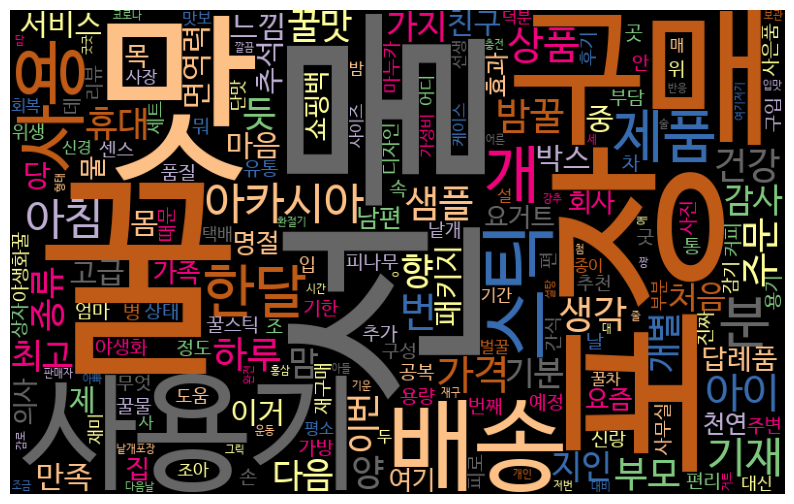

In [36]:
wc_analysis(shopping_data['cleaned_tokens'])

In [66]:
kw_in_nouns('ÏùåÎ£å')

' ÏùåÎ£å ' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù 52 Í±¥


380                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                ÏùåÎ£

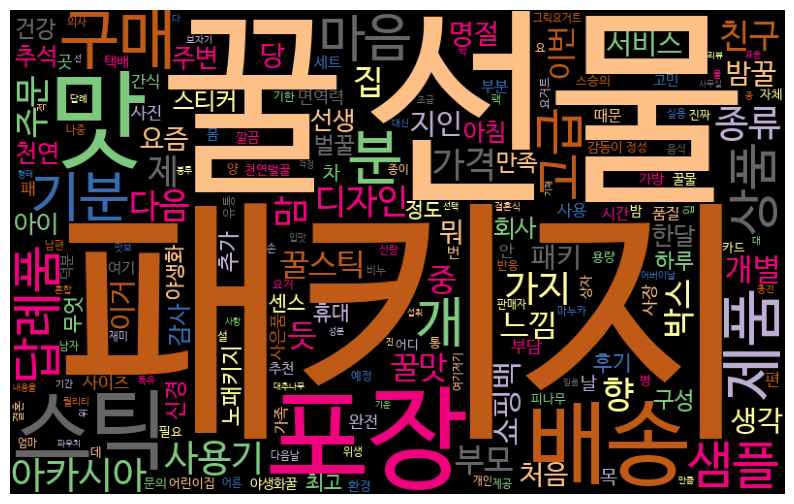

In [20]:
wc_kw(1, 'Ìå®ÌÇ§ÏßÄ')

Ìå®ÌÇ§ÏßÄ: Ïù¥ÏÅòÍ≤å, ÍπîÎÅîÌïòÍ≤å, Í≥†Í∏âÏä§ÎüΩÍ≤å
Î∏åÎûúÎî©(Ï†úÏ£º, Í±¥Í∞ï): Ï†úÏ£ºÎ•º Îã¥ÏùÄ Í±¥Í∞ïÌïòÍ≥† Í≥†Í∏â, ÍπîÎÅîÌïú Ìè¨Ïû•Ïóê ÍøÄ Ïä§Ìã± Î∏åÎûúÎî©ÌïòÎ©¥ Ï¢ãÏùÑ ÎìØ
Ï≤®Í∞ÄÎ¨º:
Î†àÏãúÌîº: ÍøÄÎ¨º, Í∑∏Î¶≠ÏöîÍ±∞Ìä∏, Í∞ÅÏ¢Ö Ï∞®(Ïë•Ï∞®, Ï∫êÎ™®ÎßàÏùº), ÌôçÏÇº

ÍøÄ ÏÑ†Î¨ºÏùÄ Ïô†ÏßÄ Ïò¨ÎìúÌï¥Î≥¥ÏòÄÎäîÎç∞ ÏõåÏª§ÎπÑ ÎßåÎÇòÍ≥† Ìé∏Í≤¨Ïù¥ Ïãπ ÏÇ¨ÎùºÏ°åÏñ¥Ïöî Ïä§Ìã±ÌòïÏù¥Îùº Í∞ÑÌé∏ÌïòÍ≤å ÍøÄÏ∞®Î•º ÎßàÏã§Ïàò ÏûàÍ≥† Ìå®ÌÇ§ÏßÄÎì§Ïù¥ ÌïòÎÇòÍ∞ôÏù¥ Í∞êÏÑ±ÌÑ∞ÏßëÎãàÎã§!! 

ÏÑ†Î¨ºÏö©ÏúºÎ°ú ÏÉÄÎäîÎç∞ ÏáºÌïëÎ∞±ÎèÑ ÏÉâÏÉÅÏù¥ ÎÑò Ïù¥ÏÅòÎÑ§Ïöî. Ï∫êÎ¶≠ÌÑ∞Í∞Ä Í∑ÄÏó¨Ïõå Î≥¥ÎäîÏÇ¨ÎûåÎèÑ Í∞ôÏù¥ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïÑ ÏßëÎãàÎã§.

In [21]:
# Ìè¨Ïû•
package_kw = ['Ìå®ÌÇ§ÏßÄ', 'Ìè¨Ïû•', 'ÏáºÌïëÎ∞±', 'ÎîîÏûêÏù∏', 'Ìå®ÌÇ§Ïßï', 'Í≥†Í∏â', 'Ìå®ÌÇ§', 'Î≥¥ÌãÄ', 'ÏºÄÏù¥Ïä§', 'ÌÇ§Ìä∏', 'Ïö©Í∏∞', 'ÏÉâÍ∞ê', 'Ìè¨Ïû•ÏßÄ', 'Î≥¥ÏûêÍ∏∞', 'Ï∫î', 'Ïä§Ìã∞Ïª§']

### ÎùºÎ≤®ÎßÅ
- Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥ ÎùºÎ≤®ÎßÅ ÏßÑÌñâ

In [68]:
shopping_all = pd.read_excel(r'C:\Users\NT550\asac\SIH\SIH\code2\result\ÏáºÌïë_Î™ÖÏÇ¨_all.xlsx')
shopping_all.head()

Unnamed: 0  Îã®Ïñ¥       ÌíàÏÇ¨    ÎπàÎèÑÏàò
0          15  ÏÑ†Î¨º  NNG/NNP  13163
1          19   ÍøÄ  NNG/NNP  12400
2          29  Ìè¨Ïû•  NNG/NNP   9174
3          33   Îßõ  NNG/NNP   8679
4          34  Íµ¨Îß§  NNG/NNP   8624

In [72]:
from collections import defaultdict

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ Í∑∏Î£πÌôî
similar_words = {
    'ÏöîÍ±∞Ìä∏': ['Í±∞Ìä∏', 'ÏöîÍ±∞Ìä∏', 'Í∑∏Î¶≠ÏöîÍ±∞Ìä∏'],
    'Î¨º': ['Î¨º', 'ÍøÄÎ¨º'],
    'ÎîîÏ†ÄÌä∏': ['ÎîîÏ†ÄÌä∏'],
    'Ïª§Ìîº': ['Ïª§Ìîº'],
    'Îñ°': ['Îñ°', 'Í∞ÄÎûòÎñ°'],
    'ÏùåÎ£å': ['ÏùåÎ£å', 'Ïö∞Ïú†', 'Ï£ºÏä§', 'ÎØ∏Ïà´Í∞ÄÎ£®', 'ÏÑ†Ïãù'],
    'Í≥ºÏùº': ['Í≥ºÏùº', 'Îî∏Í∏∞', 'Î≥µÏà≠ÏïÑ', 'Î†àÎ™¨', 'ÌÜ†ÎßàÌÜ†'],
    'Îπµ': ['Îπµ'],
    'Ï∞®': ['Ï∞®', 'ÎÖπÏ∞®'],
    'Í≤¨Í≥ºÎ•ò': ['Í≤¨Í≥º'],
    'ÌîºÏûê': ['ÌîºÏûê']
}

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÎπàÎèÑÏàò Ìï©ÏÇ∞
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['Îã®Ïñ¥']
    frequency = row['ÎπàÎèÑÏàò']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # Í∑∏Î£πÏóê ÏÜçÌïú Í≤ΩÏö∞ Î£®ÌîÑ Ï¢ÖÎ£å

# Í∑∏Î£πÌôîÌïú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
grouped_data = {'Îã®Ïñ¥ Í∑∏Î£π': [], 'ÎπàÎèÑÏàò': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['Îã®Ïñ¥ Í∑∏Î£π'].append(group)
    grouped_data['ÎπàÎèÑÏàò'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# Í≤∞Í≥º Ï∂úÎ†•
grouped_df

Îã®Ïñ¥ Í∑∏Î£π  ÎπàÎèÑÏàò
0    ÏöîÍ±∞Ìä∏  857
1      Î¨º  925
2      Ï∞®  378
3     Ïª§Ìîº  269
4      Îñ°  173
5     ÏùåÎ£å  323
6     Í≥ºÏùº  200
7      Îπµ   91
8    Í≤¨Í≥ºÎ•ò   27
9    ÎîîÏ†ÄÌä∏   17
10    ÌîºÏûê   14

In [73]:
grouped_df.to_csv('recipe_frequent.csv')

In [ ]:
# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ Í∑∏Î£πÌôî
similar_words = {
    'yogurt': ['Í±∞Ìä∏', 'ÏöîÍ±∞Ìä∏', 'Í∑∏Î¶≠ÏöîÍ±∞Ìä∏'],
    'water': ['Î¨º', 'ÍøÄÎ¨º'],
    'dessert': ['ÎîîÏ†ÄÌä∏'],
    'coffee': ['Ïª§Ìîº'],
    'dduk': ['Îñ°', 'Í∞ÄÎûòÎñ°'],
    'juice': ['ÏùåÎ£å', 'Ïö∞Ïú†', 'Ï£ºÏä§', 'ÎØ∏Ïà´Í∞ÄÎ£®', 'ÏÑ†Ïãù'],
    'fruit': ['Í≥ºÏùº', 'Îî∏Í∏∞', 'Î≥µÏà≠ÏïÑ', 'Î†àÎ™¨', 'ÌÜ†ÎßàÌÜ†'],
    'bread': ['Îπµ'],
    'tea': ['Ï∞®', 'ÎÖπÏ∞®'],
    'Nuts': ['Í≤¨Í≥º'],
    'pizza': ['ÌîºÏûê']
}

# Ïú†ÏÇ¨Ìïú ÏùòÎØ∏Ïùò Îã®Ïñ¥Îì§ÏùÑ Í∑∏Î£πÌôîÌïòÍ≥† ÎπàÎèÑÏàò Ìï©ÏÇ∞
grouped_word_counts = defaultdict(int)
for idx, row in shopping_all.iterrows():
    word = row['Îã®Ïñ¥']
    frequency = row['ÎπàÎèÑÏàò']
    
    for group, similar_words_list in similar_words.items():
        if word in similar_words_list:
            grouped_word_counts[group] += frequency
            break  # Í∑∏Î£πÏóê ÏÜçÌïú Í≤ΩÏö∞ Î£®ÌîÑ Ï¢ÖÎ£å

# Í∑∏Î£πÌôîÌïú Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
grouped_data = {'Îã®Ïñ¥ Í∑∏Î£π': [], 'ÎπàÎèÑÏàò': []}
for group, frequency in grouped_word_counts.items():
    grouped_data['Îã®Ïñ¥ Í∑∏Î£π'].append(group)
    grouped_data['ÎπàÎèÑÏàò'].append(frequency)

grouped_df = pd.DataFrame(grouped_data)

# Í≤∞Í≥º Ï∂úÎ†•
print(grouped_df)

'Í∑ÄÏóΩÎã§'

In [ ]:
kw_in_df('Í∑ÄÏóΩ')

' Í∑ÄÏóΩ ' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù 581 Í±¥


0                                                                                                                                             ¬∞Í≥†ÎßàÏö¥ ÏùºÏù¥ ÏÉùÍ≤®, ÏßÄÏù∏Î∂ÑÍªò ÏÑ†Î¨ºÎ°úÎèÑ ÎìúÎ¶¨Í≥†~ ÎÇòÎèÑ Î®πÍ≥†! Ïû¨Ï£ºÎ¨∏ ÌñàÏñ¥Ïöî~, Ìè¨Ïû•Ïù¥ ÎÑàÎ¨¥ Í∑ÄÏóΩ! ÏñºÍ∑∏Î†àÏù¥ Ìñ•Ïù¥ ÏßÑÌïòÍ≤å ÏΩî ÎÅùÏóê!
17                                                                                                                                                                                            ÏÑ†Î¨ºÏö©ÏúºÎ°ú Íµ¨Îß§Ìï¥Î¥§ÎäîÎç∞ Ìå®ÌÇ§ÏßÄÍ∞Ä Í∑ÄÏóΩÎÑ§Ïöî. 
30                                                                                                                                                           ÏñºÍ∑∏Î†àÏù¥Ìñ•Ïù¥ ÏßÑÌïòÍ≤å ÎÇòÏÑú ÎÑàÎ¨¥ ÎßõÏûàÏóàÏñ¥Ïöî~ Ìå®ÌÇ§ÏßÄÎèÑ ÎÑàÎ¨¥ Í∑ÄÏóΩÍ≥† ÎßõÏûàÏñ¥ÏÑú Ìïú ÌÜµ ÏàúÏÇ≠Ìï† Îªî ÌñàÏñ¥Ïöî:) 
37                                                                                                                                            

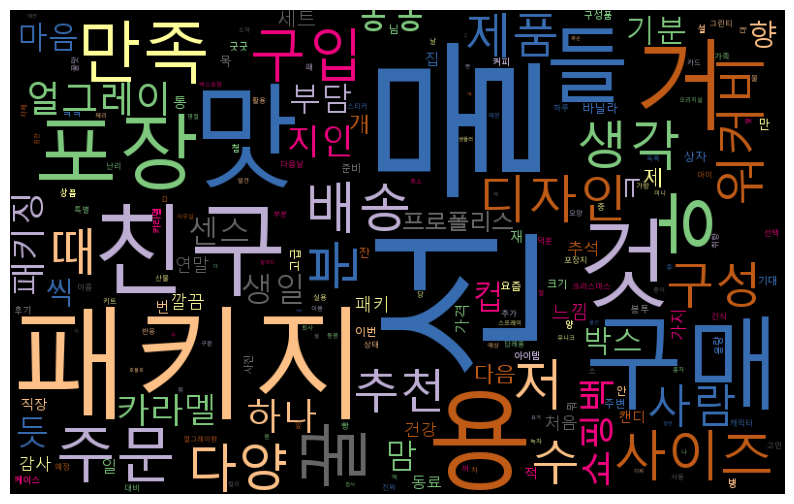

In [ ]:
wc_kw(2, 'Í∑ÄÏóΩ')